In [1]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# linear regression_Salary Prediction_GColab
# Dokumentasi ChatGPT : https://chat.openai.com/share/c4956d03-764e-49f4-bfc9-7bb4c634e223

In [2]:
# menghubungkan GColab dengan GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [4]:


# Ubah path sesuai dengan lokasi file dataset Anda di Google Drive
file_path = "/content/drive/MyDrive/Semester8/Machine Learning/lecture 2/dataset/Salary_Data_Simple_SVR.csv"

# Baca dataset sebagai DataFrame
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari DataFrame
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Prompt : saya ingin membuat model linear regression dengan dataset Salary_Data_Simple_SVR.csv, bagaimana tahapan nya?

Untuk membuat model regresi linear dengan dataset "Salary_Data_Simple_SVR.csv" di Google Colab, Anda dapat mengikuti langkah-langkah berikut:

1. **Import Library**: Mulailah dengan mengimpor library yang diperlukan, seperti pandas untuk membaca dataset dan sklearn untuk membuat model regresi linear.

2. **Membaca Dataset**: Gunakan pandas untuk membaca dataset CSV ke dalam DataFrame.

3. **Memisahkan Data**: Pisahkan dataset menjadi fitur (X) dan target (y). Dalam regresi linear sederhana, hanya ada satu fitur (variabel independen) dan satu target (variabel dependen).

4. **Membagi Data**: Bagi data menjadi data pelatihan dan data uji untuk mengevaluasi kinerja model.

5. **Membuat Model**: Gunakan sklearn untuk membuat model regresi linear.

6. **Pelatihan Model**: Latih model menggunakan data pelatihan.

7. **Evaluasi Model**: Evaluasi kinerja model menggunakan data uji.



In [6]:
# memisahkan data
X = df.iloc[:, :-1].values # Fitur
y = df.iloc[:, -1].values # Target

In [7]:
# Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan Melatih Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  49830096.85590839


In [9]:
# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216
R-squared (R2): 0.9024461774180497


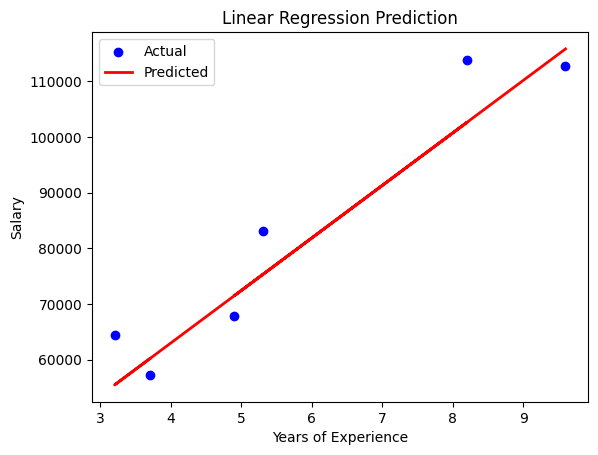

In [10]:
# Memvisualisasikan data asli
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Memvisualisasikan hasil prediksi
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Menambahkan label dan judul
plt.title('Linear Regression Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Menampilkan plot
plt.show()


Prompt : Bagaimana cara memvisualisasikan data train, data test, dengan garis regresi dari modelnya?

Untuk memvisualisasikan data pelatihan (train), data uji (test), dan garis regresi dari model.

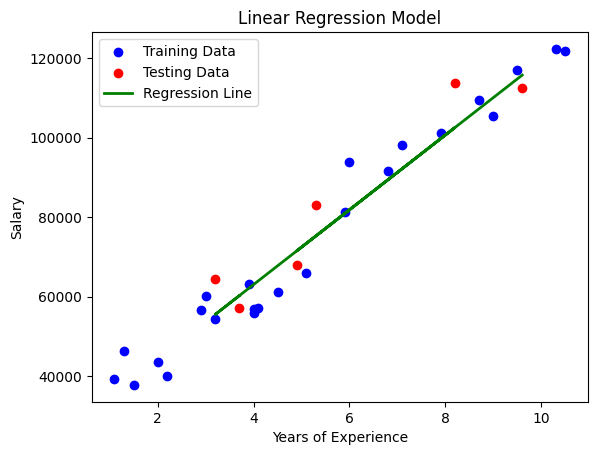

In [13]:
# Memvisualisasikan data pelatihan
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Memvisualisasikan data uji
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Membuat garis regresi dari model
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

# Menambahkan label dan judul
plt.title('Linear Regression Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Menampilkan plot
plt.show()


Prompt : Bagaimana cara mengetahui berapa nilai actual dari data test, dengan nilai prediksi dari model?


In [16]:
# Menampilkan nilai aktual dan nilai prediksi dari data uji
df_test = pd.DataFrame(X_test, columns=['YearsExperience'])
df_comparison
df_test ['Actual'] = y_test
df_test ['Predicted'] = y_pred

df_test

,YearsExperience,Actual,Predicted
0,9.6,112635.0,115790.210113
1,4.9,67938.0,71498.278095
2,8.2,113812.0,102596.868661
3,5.3,83088.0,75267.804224
4,3.2,64445.0,55477.792045
5,3.7,57189.0,60189.699707


Prompt : Bagaimana cara menginputkan data baru dan meminta supaya model memberikan prediksi dari data yang kita masukkan?

Untuk menginputkan data baru dan meminta model memberikan prediksi, Anda dapat mengikuti langkah-langkah berikut:

1. Terlebih dahulu, buat fungsi atau skrip yang memungkinkan pengguna untuk memasukkan data baru.
2. Gunakan model yang sudah dilatih untuk memprediksi output berdasarkan data baru yang dimasukkan.
3. Tampilkan prediksi kepada pengguna.

In [17]:
# Fungsi untuk memasukkan data baru dan mendapatkan prediksi
def predict_salary(model):
    # Meminta pengguna memasukkan data baru
    years_exp = float(input("Masukkan tahun pengalaman: "))

    # Membuat array 2 dimensi dengan data baru
    new_data = [[years_exp]]

    # Melakukan prediksi dengan model yang diberikan
    predicted_salary = model.predict(new_data)

    # Menampilkan prediksi kepada pengguna
    print("Prediksi gaji berdasarkan tahun pengalaman {} adalah: ${:,.2f}".format(years_exp, predicted_salary[0]))

# Meminta prediksi menggunakan model yang sudah dilatih
predict_salary(model)


Masukkan tahun pengalaman: 10
Prediksi gaji berdasarkan tahun pengalaman 10.0 adalah: $119,559.74
